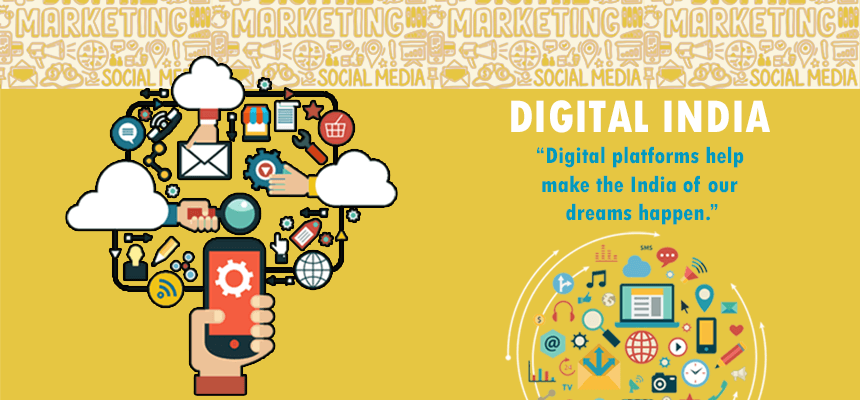

# What is digital india ?

# Based on the twitter data we are going to summarises the public opinion on the DigitalIndia 

# Imporing Libraries

In [1]:
import re
import pandas as pd
from cleantext import clean
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tweets = pd.read_csv("C:\\Users\\GURRAM\\OneDrive\\Desktop\\DATA SETS\\tweets.csv")

In [3]:
tweets.head(15)

,Unnamed: 0,Date,User,Tweet
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary @IMPraveenDalal Is ...
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and #Ge...
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE: Find Online Citizen Services QUIC...
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope - First Images from...
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled. With Integrated...
5,5,2022-12-02 10:50:08+00:00,CongressOrBJP,Do not forget that international cabal and #Ge...
6,6,2022-12-02 10:19:41+00:00,tejasvisharma,"Digi Yatra made available from today at Delhi,..."
7,7,2022-12-02 08:58:36+00:00,INDIAdrive21,INDIA DRIVE: Find Online Citizen Services QUIC...
8,8,2022-12-02 08:49:31+00:00,_AFPOH,AFPOH Startup Of Visionary @IMPraveenDalal Is...
9,9,2022-12-02 08:46:21+00:00,_AFPOH,#Telelaw Startup Of Visionary @IMPraveenDalal ...


In [4]:
print(f"Null values per column : \n\n{tweets.isna().sum()}")

Null values per column : 

Unnamed: 0    0
Date          0
User          0
Tweet         0
dtype: int64


In [5]:
print('Dataset size:',tweets.shape)
print('Columns are:',tweets.columns)

Dataset size: (10000, 4)
Columns are: Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   Date        10000 non-null  object
 2   User        10000 non-null  object
 3   Tweet       10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


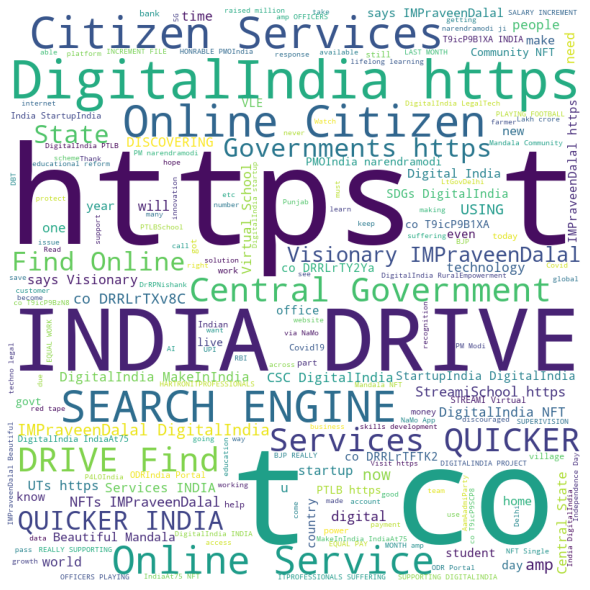

In [8]:
from wordcloud import WordCloud, STOPWORDS
tweets= pd.read_csv(r"C:\\Users\\GURRAM\\OneDrive\\Desktop\\DATA SETS\\tweets.csv")
text=" ".join(cat for cat in tweets.Tweet)
wordcloud=WordCloud(width= 800, height= 800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(text)
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

As form above wordcloud we can say that the Noise data is mostly repeting

# Removing Noise Data

1.Mentions Removal
2.URl removal
3.Number Removal and Special Characters
4.Remove Ordinals
5.punctuations removal


In [9]:
def clean_tweet(text):
    """
    Removes punctuation, emojis, normalizes whitespaces...from a text
    """
    
    text = clean(text,
                 no_punct=True,
                 lower=True,
                 no_emoji=True,
                 normalize_whitespace=True
                )
    
    return text

In [10]:
# Remove mentions
regex_mentions = r"@[A-Za-z0-9_]+"
# Remove links
regex_links = r"https?://[A-Za-z0-9./]+"
# Remove some special characters
regex_special = r"[^A-Za-z0-9]+"
# Remove numbers 
regex_numbers = r"[0-9]+"
# Remove ordinals 
regex_ordinals = r"[0-9]+(?:st| st|nd| nd|rd| rd|th| th)"

In [11]:
# Remove mentions
tweets.Tweet =tweets.Tweet .apply(lambda x: re.sub(regex_mentions, " ", str(x).strip()))
# Remove links 
tweets.Tweet = tweets.Tweet.apply(lambda x: re.sub(regex_links, " ", str(x).strip()))
# Remove special characters
tweets.Tweet = tweets.Tweet.apply(lambda x: re.sub(regex_special, " ", str(x).strip()))
# Remove ordinals
tweets.Tweet = tweets.Tweet.apply(lambda x: re.sub(regex_ordinals, " ", str(x).strip()))
# Remove numbers 
tweets.Tweet = tweets.Tweet.apply(lambda x: re.sub(regex_numbers, " ", str(x).strip()))
 

In [12]:
tweets.head(10)

,Unnamed: 0,Date,User,Tweet
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...
5,5,2022-12-02 10:50:08+00:00,CongressOrBJP,Do not forget that international cabal and Gen...
6,6,2022-12-02 10:19:41+00:00,tejasvisharma,Digi Yatra made available from today at Delhi ...
7,7,2022-12-02 08:58:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...
8,8,2022-12-02 08:49:31+00:00,_AFPOH,AFPOH Startup Of Visionary Is The Digital Comp...
9,9,2022-12-02 08:46:21+00:00,_AFPOH,Telelaw Startup Of Visionary Would Resolve Gro...


In [13]:
tweets.tail(10)

,Unnamed: 0,Date,User,Tweet
9990,9990,2020-12-11 09:32:16+00:00,ManishKumar302,A lot depends on the state of telecom companie...
9991,9991,2020-12-11 05:03:28+00:00,CSCegov_,CSC Spotlight Stories of Digital Transformatio...
9992,9992,2020-12-11 02:19:31+00:00,subratbehera,Free Wi Fi from center DigitalIndia AtmaNirbha...
9993,9993,2020-12-10 17:47:09+00:00,Raheeb54218553,No response from toll free customer care email...
9994,9994,2020-12-10 17:42:25+00:00,Raheeb54218553,No response from toll free customer care email...
9995,9995,2020-12-10 16:32:45+00:00,Azamlebbai,I intimate for this issue from Last Week Kya...
9996,9996,2020-12-10 16:08:26+00:00,RahulFatuha,If I have to walkin to nearest exchange which ...
9997,9997,2020-12-10 14:41:16+00:00,DrManavAITC,foundation while the PMO profit making organiz...
9998,9998,2020-12-10 11:32:42+00:00,achowdhary81,We are trying to upload the statement A of re...
9999,9999,2020-12-10 11:32:33+00:00,CSCegov_,CSC Spotlight Stories of Digital Transformatio...


# Remove punctuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweets['Tweet_punct'] = tweets['Tweet'].apply(lambda x: remove_punct(x))
tweets.head(10)

,Unnamed: 0,Date,User,Tweet,Tweet_punct
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...,James Webb Space Telescope First Images from t...
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...,Get billed for what is filled With Integrated ...
5,5,2022-12-02 10:50:08+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...
6,6,2022-12-02 10:19:41+00:00,tejasvisharma,Digi Yatra made available from today at Delhi ...,Digi Yatra made available from today at Delhi ...
7,7,2022-12-02 08:58:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...
8,8,2022-12-02 08:49:31+00:00,_AFPOH,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...
9,9,2022-12-02 08:46:21+00:00,_AFPOH,Telelaw Startup Of Visionary Would Resolve Gro...,Telelaw Startup Of Visionary Would Resolve Gro...


# Tokenization

In [16]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweets['Tweet_tokenized'] = tweets['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweets.head()

,Unnamed: 0,Date,User,Tweet,Tweet_punct,Tweet_tokenized
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...,"[afpoh, startup, of, visionary, is, the, digit..."
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...,"[do, not, forget, that, international, cabal, ..."
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...,"[india, drive, find, online, citizen, services..."
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...,James Webb Space Telescope First Images from t...,"[james, webb, space, telescope, first, images,..."
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...,Get billed for what is filled With Integrated ...,"[get, billed, for, what, is, filled, with, int..."


# Remove stopwords

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GURRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopword = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets['Tweet_nonstop'] = tweets['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweets.head()

,Unnamed: 0,Date,User,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...,"[afpoh, startup, of, visionary, is, the, digit...","[afpoh, startup, visionary, digital, companion..."
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...,"[do, not, forget, that, international, cabal, ...","[forget, international, cabal, genocidalmaniac..."
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...,"[india, drive, find, online, citizen, services...","[india, drive, find, online, citizen, services..."
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...,James Webb Space Telescope First Images from t...,"[james, webb, space, telescope, first, images,...","[james, webb, space, telescope, first, images,..."
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...,Get billed for what is filled With Integrated ...,"[get, billed, for, what, is, filled, with, int...","[get, billed, filled, integrated, payment, sol..."


# Stemming and Lammitization

In [20]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets['Tweet_stemmed'] = tweets['Tweet_nonstop'].apply(lambda x: stemming(x))
tweets.head()

,Unnamed: 0,Date,User,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...,"[afpoh, startup, of, visionary, is, the, digit...","[afpoh, startup, visionary, digital, companion...","[afpoh, startup, visionari, digit, companion, ..."
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...,"[do, not, forget, that, international, cabal, ...","[forget, international, cabal, genocidalmaniac...","[forget, intern, cabal, genocidalmaniac, snatc..."
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...,"[india, drive, find, online, citizen, services...","[india, drive, find, online, citizen, services...","[india, drive, find, onlin, citizen, servic, q..."
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...,James Webb Space Telescope First Images from t...,"[james, webb, space, telescope, first, images,...","[james, webb, space, telescope, first, images,...","[jame, webb, space, telescop, first, imag, uns..."
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...,Get billed for what is filled With Integrated ...,"[get, billed, for, what, is, filled, with, int...","[get, billed, filled, integrated, payment, sol...","[get, bill, fill, integr, payment, solut, exac..."


In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GURRAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets['Tweet_lemmatized'] = tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweets.head()

,Unnamed: 0,Date,User,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,2022-12-02 19:50:26+00:00,CongressOrBJP,AFPOH Startup Of Visionary Is The Digital Comp...,AFPOH Startup Of Visionary Is The Digital Comp...,"[afpoh, startup, of, visionary, is, the, digit...","[afpoh, startup, visionary, digital, companion...","[afpoh, startup, visionari, digit, companion, ...","[afpoh, startup, visionary, digital, companion..."
1,1,2022-12-02 19:49:14+00:00,CongressOrBJP,Do not forget that international cabal and Gen...,Do not forget that international cabal and Gen...,"[do, not, forget, that, international, cabal, ...","[forget, international, cabal, genocidalmaniac...","[forget, intern, cabal, genocidalmaniac, snatc...","[forget, international, cabal, genocidalmaniac..."
2,2,2022-12-02 17:18:36+00:00,INDIAdrive21,INDIA DRIVE Find Online Citizen Services QUICK...,INDIA DRIVE Find Online Citizen Services QUICK...,"[india, drive, find, online, citizen, services...","[india, drive, find, online, citizen, services...","[india, drive, find, onlin, citizen, servic, q...","[india, drive, find, online, citizen, service,..."
3,3,2022-12-02 14:55:01+00:00,indiamarketing_,James Webb Space Telescope First Images from t...,James Webb Space Telescope First Images from t...,"[james, webb, space, telescope, first, images,...","[james, webb, space, telescope, first, images,...","[jame, webb, space, telescop, first, imag, uns...","[james, webb, space, telescope, first, image, ..."
4,4,2022-12-02 11:30:00+00:00,HPCL,Get billed for what is filled With Integrated ...,Get billed for what is filled With Integrated ...,"[get, billed, for, what, is, filled, with, int...","[get, billed, filled, integrated, payment, sol...","[get, bill, fill, integr, payment, solut, exac...","[get, billed, filled, integrated, payment, sol..."


In [23]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

# Vectorisation

In [24]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweets['Tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

10000 Number of tweets has 13163 words


In [25]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aabaz,aadhaar,aadhaarcard,aadhaaronlineservic,aadhaarpvccard,aadhaarupd,aadhar,aadharcard,aadharpanlink,...,zone,zoo,zoom,zoomcar,zopnot,zorro,zotei,zubair,zumalabazi,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Twitter Sentiment Analysis

Sentiment analysis is a natural language processing technique used to identify the emotional tone of pieces of writing. In most cases, goal is to determine whether the corpus is postive, negative or neutral.

In [26]:
import nltk.data
from nltk.stem.porter import *
#pd.options.mode.chained_assignment = None
import os
import nltk
from textblob import TextBlob

In [27]:
from textblob import TextBlob
### My input text is a column from a dataframe that contains tweets. 

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

tweets['sentiment'] = tweets['Tweet'].apply(sentiment)

In [28]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
tweets['polarity'] = tweets['Tweet'].apply(analize_sentiment)

In [29]:
Neutral=0
Positive=0
Negative=0
for i in tweets['polarity']:
    if i==0:
        Neutral=Neutral+1
    elif i==1:
        Positive=Positive+1
    else:
        Negative =Negative+1
print(Neutral)
print(Positive)
print(Negative)

3579
4696
1725


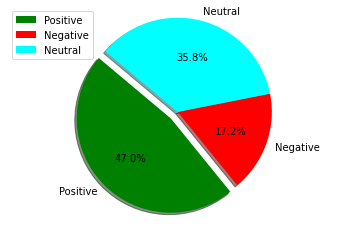

In [30]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [Positive, Negative, Neutral]
colors = ['Green', 'Red', 'cyan']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# Topic Modelling

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter

Loading BokehJS ...

In [32]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])


In [33]:


reindexed_data = tweets['Tweet']


In [34]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

NameError: name 'np' is not defined

In [37]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: Covid  Anything that comes from the manufactures of Covid  DeathShots must be out rightly rejected They do not care about your health but making money at the cost of your health and lives Enough is enough says DigitalIndia IndiaAt 
Headline after vectorization: 
  (0, 4073)	1
  (0, 9671)	1
  (0, 3218)	2
  (0, 7319)	1
  (0, 13072)	1
  (0, 6708)	2
  (0, 3625)	1
  (0, 8772)	1
  (0, 2793)	1
  (0, 9039)	1
  (0, 3173)	1
  (0, 9130)	1
  (0, 12631)	1
  (0, 12315)	1
  (0, 2185)	1


# Latent Semantic Analysis(LSA)

In [38]:
n_topics = 8

In [39]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [40]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
lsa_keys = get_keys(lsa_topic_matrix)

In [41]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [42]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [44]:
import numpy as np

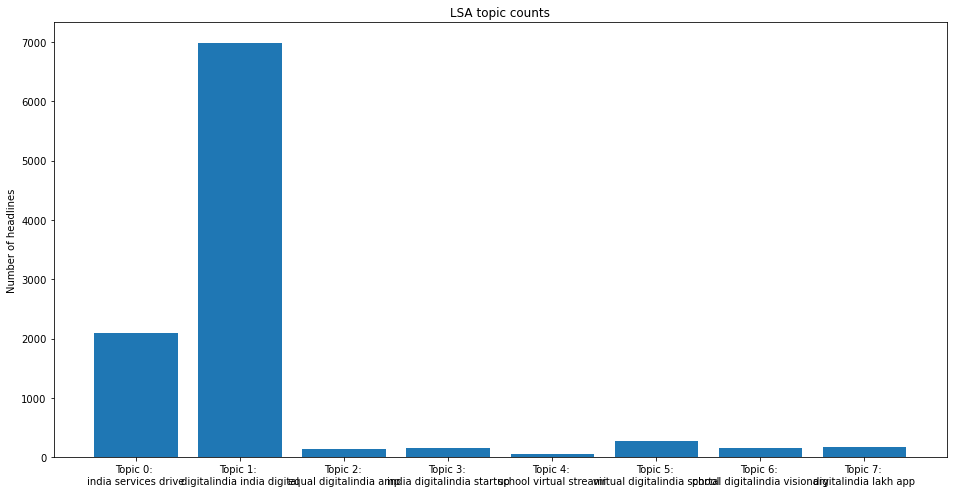

In [45]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [46]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  india services drive online digitalindia search central citizen engine state
Topic 2:  digitalindia india digital amp says nfts covid visionary csc govt
Topic 3:  equal digitalindia amp project bjp honrable pay work hartronitprofessionals supporting
Topic 4:  india digitalindia startup startupindia million funding raised apps led capital
Topic 5:  school virtual streami digitalindia skills india development visionary online level
Topic 6:  virtual digitalindia school streami csc vle india kids class blockchain
Topic 7:  portal digitalindia visionary cyber remedy makeinindia phishing india reporting waste
Topic 8:  digitalindia lakh app namo public money crore power benefits key


In [47]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 1.005s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.247532
[t-SNE] KL divergence after 2000 iterations: 0.391690


In [48]:
 #Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [49]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [50]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)


# Latent Dirichilet Allocation(LDA)

In [51]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [52]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [53]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  digitalindia offices india startups covid sdgs taking red tape educational
Topic 2:  digitalindia india portal visionary says people cyber punjab new smartphone
Topic 3:  india services drive online digitalindia search engine central citizen state
Topic 4:  digitalindia india visionary virtual school portal streami says education sdgs
Topic 5:  digitalindia amp india equal digital app work pm bjp supporting
Topic 6:  digitalindia india digital bank amp money app days account service
Topic 7:  digitalindia india nfts nft amp digital beautiful mandala indiaat covid
Topic 8:  digitalindia csc vle india digital startup startupindia funding million raised


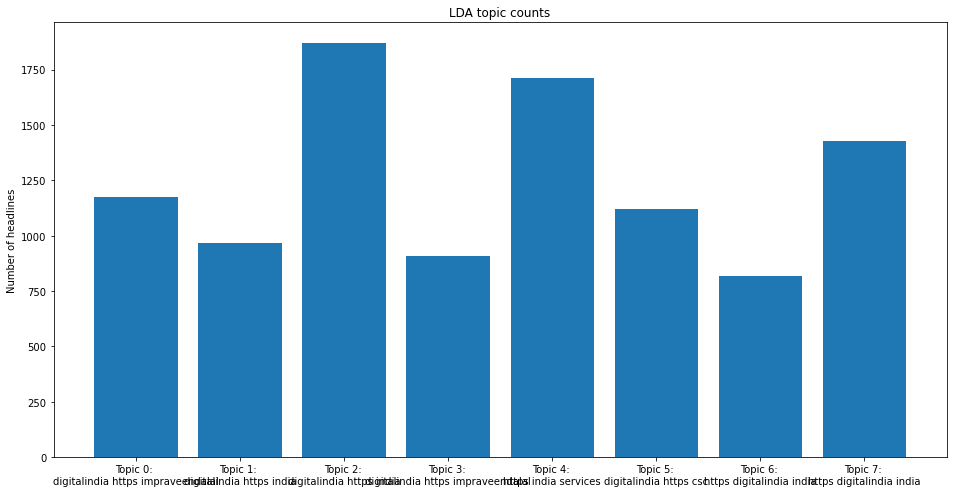

In [306]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [54]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 1.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.353111
[t-SNE] KL divergence after 2000 iterations: 0.791486


In [55]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)